<a href="https://colab.research.google.com/github/SambhavRekhawat/test/blob/main/Vasicek_interest_rate_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## VASICEK INTEREST RATE MODEL

The Vasicek model, introduced in 1977, was the initial model to incorporate the mean reversion characteristic of interest rates, a feature absent in geometric Brownian motion. This model is based on the Ornstein-Uhlenbeck process.

The Vasicek stochastic differential equation

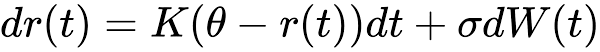

[*********************100%%**********************]  1 of 1 completed


Number of non-missing values: 3128


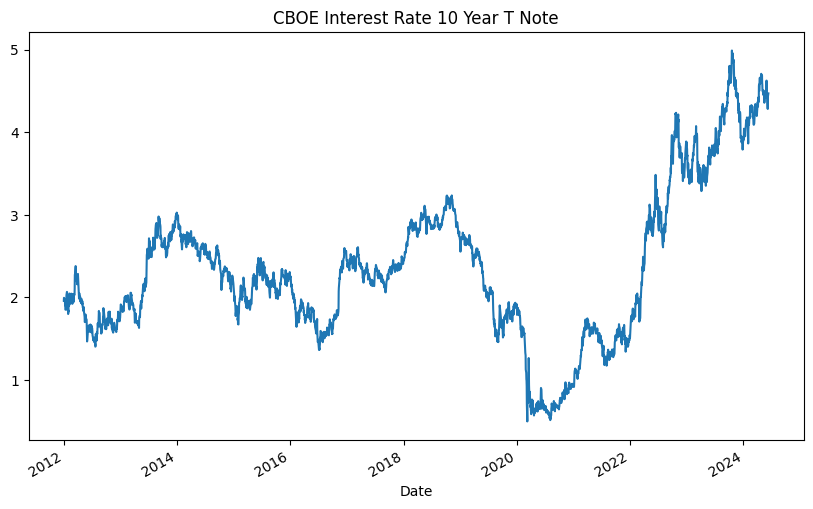

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

# Download historical yield data
symbol = "^TNX"
start_date = "2012-01-01"
end_date = "2024-06-11"
data = yf.download(symbol, start=start_date, end=end_date)

# Extract adjusted closing prices and remove missing values
rate_df = data[['Open', 'High', 'Low', 'Adj Close']].dropna()

# Plotting the chart
rate_df['Adj Close'].plot(figsize=(10,6), title='CBOE Interest Rate 10 Year T Note')

# Get the length of non-missing values
n = len(rate_df)
print("Number of non-missing values:", n)

In [4]:
rate = rate_df['Adj Close']
ratek = np.array(rate)
ratekplus1 = np.concatenate((ratek[1:], [0]))

n = len(ratek)
oneminusbdt = (np.sum(ratek * ratekplus1) - np.sum(ratek) * np.sum(ratekplus1) / n) / (np.sum(ratek * ratek) - np.sum(ratek) * np.sum(ratek) / n)
adt = np.sum(ratekplus1) / n - oneminusbdt * np.sum(ratek) / n
sigmadt = np.sqrt(np.sum((ratekplus1 - oneminusbdt * ratek - adt)**2) / n)

print("oneminusbdt:", oneminusbdt)
print("adt:", adt)
print("sigmadt:", sigmadt)

oneminusbdt: 0.9954637818472002
adt: 0.009992704163091837
sigmadt: 0.09514337490318442


Text(0, 0.5, 'Yield')

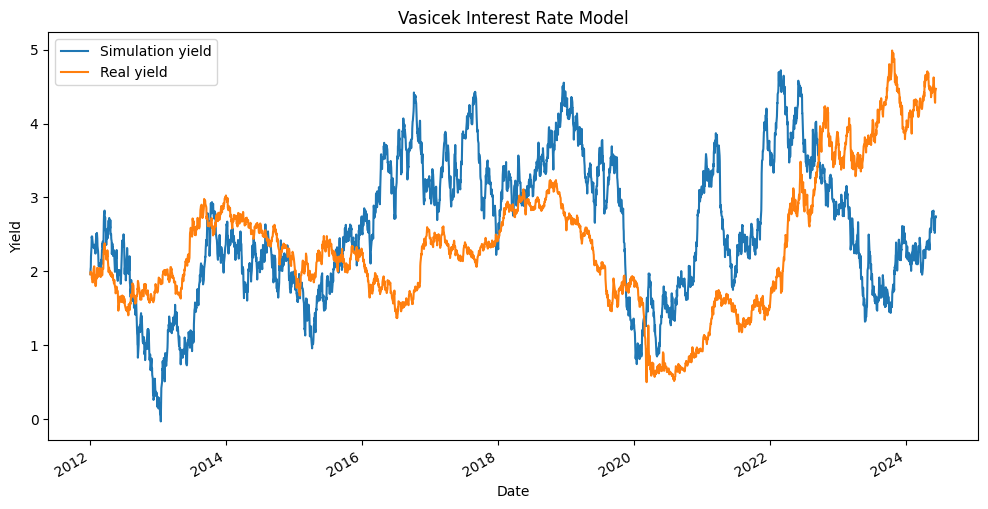

In [8]:
import statsmodels.api as sm
import time

arparams = np.array([oneminusbdt])
maparams = np.array([.0])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
ar_sim = sm.tsa.arma_generate_sample(ar, ma, n)

y = adt / oneminusbdt + sigmadt * ar_sim
y = y + rate.iloc[0] - y[0]

sim_yield = pd.Series(y, index=pd.to_datetime(rate.index))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
sim_yield.plot(ax = axes, title='Vasicek Interest Rate Model')
rate.plot(ax = axes)
axes.legend(['Simulation yield','Real yield'])
axes.set_ylabel('Yield')